# Notebook resumen
Para este proyecto de Machine Learning, hemos elegido un set de datos de Kaggle que contiene un ranking de los 100 repositorios de Python mas populares desde diciembre de 2018 hasta el inicio del trabajo en febrero de 2024. El objetivo es crear un modelo que prediga el n√∫mero de forks que se realizan sobre un repostorio.

## Librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualizaci√≥n
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from matplotlib.ticker import FixedLocator, FixedFormatter

import seaborn as sns

# Preporcesado
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Clusterinzaci√≥n
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Baselines y optimizaci√≥n
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Vectorizaci√≥n
from sklearn.feature_extraction.text import CountVectorizer

# Regex
import re

# nlp
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import spacy
from collections import Counter

# Warnigs
import warnings
warnings.filterwarnings("ignore")

## Carga de datos

In [2]:
df = pd.read_csv("..\data\\raw\popular_python_projects.csv")

## √çndice

1. EDA

2. Limpieza

3. Feature engeneering

4. Transformaciones y escalado

5. Clusterizaci√≥n

6. Modelo cluster 0

7. Modelo cluster 1

8. Modelo cluster 2

## 1. EDA

### Primera exploraci√≥n

In [3]:
df.head()

date  rank    item             repo_name  stars  forks language  \
0  2018-12-18     1  Python        awesome-python  58777  11448   Python   
1  2018-12-18     2  Python  system-design-primer  53575   7570   Python   
2  2018-12-18     3  Python                models  46039  28053   Python   
3  2018-12-18     4  Python           public-apis  45373   4707   Python   
4  2018-12-18     5  Python            youtube-dl  44956   7820   Python   

                                            repo_url     username  issues  \
0            https://github.com/vinta/awesome-python        vinta     439   
1  https://github.com/donnemartin/system-design-p...  donnemartin      68   
2               https://github.com/tensorflow/models   tensorflow    1324   
3           https://github.com/toddmotto/public-apis    toddmotto       5   
4                  https://github.com/rg3/youtube-dl          rg3    2566   

            last_commit                                        description  
0  2018-12-13T08:29:32Z  A curated list of awesome Python frameworks, l...  
1  2018-12-18T11:20:56Z  Learn how to design large-scale systems. Prep ...  
2  2018-12-18T02:29:33Z          Models and examples built with TensorFlow  
3  2018-12-18T11:24:53Z  A collective list of free APIs for use in soft...  
4  2018-12-18T11:18:21Z  Command-line program to download videos from Y...

In [4]:
df.tail()

date  rank    item               repo_name  stars  forks  \
170275  2024-02-03    96  Python               diffusers  20767   4297   
170276  2024-02-03    97  Python  Awesome-Linux-Software  20672   2005   
170277  2024-02-03    98  Python             insightface  20230   5040   
170278  2024-02-03    99  Python                   Gooey  20130   1091   
170279  2024-02-03   100  Python            DeepFaceLive  20093   3172   

       language                                           repo_url  \
170275   Python           https://github.com/huggingface/diffusers   
170276   Python  https://github.com/luong-komorebi/Awesome-Linu...   
170277   Python         https://github.com/deepinsight/insightface   
170278   Python                https://github.com/chriskiehl/Gooey   
170279   Python             https://github.com/iperov/DeepFaceLive   

              username  issues           last_commit  \
170275     huggingface     289  2024-02-03T02:59:18Z   
170276  luong-komorebi       8  2024-01-27T10:02:38Z   
170277     deepinsight    1011  2023-12-24T05:29:03Z   
170278      chriskiehl     126  2024-01-29T12:27:25Z   
170279          iperov       1  2023-07-28T10:14:16Z   

                                              description  
170275  ü§ó Diffusers: State-of-the-art diffusion models...  
170276               üêß A list of awesome Linux softwares   
170277   State-of-the-art 2D and 3D Face Analysis Project  
170278  Turn (almost) any Python command line program ...  
170279  Real-time face swap for PC streaming or video ...

In [5]:
df.shape

(170280, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170280 entries, 0 to 170279
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         170280 non-null  object
 1   rank         170280 non-null  int64 
 2   item         170280 non-null  object
 3   repo_name    170280 non-null  object
 4   stars        170280 non-null  int64 
 5   forks        170280 non-null  int64 
 6   language     170280 non-null  object
 7   repo_url     170280 non-null  object
 8   username     170280 non-null  object
 9   issues       170280 non-null  int64 
 10  last_commit  170280 non-null  object
 11  description  168687 non-null  object
dtypes: int64(4), object(8)
memory usage: 15.6+ MB


Si el ranking es el top 100, eso quiere decir que siempre que se actualiza la base de datos se a√±ade una entrada por puesto.

In [7]:
df["rank"].value_counts()

rank
1      1722
32     1722
34     1722
35     1722
36     1722
       ... 
75     1674
76     1674
77     1674
78     1674
100    1674
Name: count, Length: 100, dtype: int64

In [8]:
#comprobamos que el ranking tiene distintos repositorios
df[df["rank"] == 1] 

date  rank    item       repo_name   stars  forks language  \
0       2018-12-18     1  Python  awesome-python   58777  11448   Python   
100     2018-12-19     1  Python  awesome-python   58801  11454   Python   
200     2018-12-20     1  Python  awesome-python   58840  11455   Python   
300     2018-12-21     1  Python  awesome-python   58882  11465   Python   
400     2018-12-22     1  Python  awesome-python   58936  11470   Python   
...            ...   ...     ...             ...     ...    ...      ...   
169780  2024-01-30     1  Python     public-apis  277535  31168   Python   
169880  2024-01-31     1  Python     public-apis  277656  31177   Python   
169980  2024-02-01     1  Python     public-apis  277800  31191   Python   
170080  2024-02-02     1  Python     public-apis  277965  31207   Python   
170180  2024-02-03     1  Python     public-apis  278085  31228   Python   

                                          repo_url     username  issues  \
0          https://github.com/vinta/awesome-python        vinta     439   
100        https://github.com/vinta/awesome-python        vinta     439   
200        https://github.com/vinta/awesome-python        vinta     439   
300        https://github.com/vinta/awesome-python        vinta     440   
400        https://github.com/vinta/awesome-python        vinta     439   
...                                            ...          ...     ...   
169780  https://github.com/public-apis/public-apis  public-apis       4   
169880  https://github.com/public-apis/public-apis  public-apis       2   
169980  https://github.com/public-apis/public-apis  public-apis       2   
170080  https://github.com/public-apis/public-apis  public-apis       2   
170180  https://github.com/public-apis/public-apis  public-apis       2   

                 last_commit  \
0       2018-12-13T08:29:32Z   
100     2018-12-13T08:29:32Z   
200     2018-12-20T06:49:58Z   
300     2018-12-20T12:52:04Z   
400     2018-12-20T12:52:04Z   
...                      ...   
169780  2024-01-28T01:47:43Z   
169880  2024-01-28T01:47:43Z   
169980  2024-01-31T06:04:35Z   
170080  2024-02-01T09:06:25Z   
170180  2024-02-01T09:06:25Z   

                                              description  
0       A curated list of awesome Python frameworks, l...  
100     A curated list of awesome Python frameworks, l...  
200     A curated list of awesome Python frameworks, l...  
300     A curated list of awesome Python frameworks, l...  
400     A curated list of awesome Python frameworks, l...  
...                                                   ...  
169780                     A collective list of free APIs  
169880                     A collective list of free APIs  
169980                     A collective list of free APIs  
170080                     A collective list of free APIs  
170180                     A collective list of free APIs  

[1722 rows x 12 columns]

In [9]:
df["language"].value_counts()

language
Python    170280
Name: count, dtype: int64

In [10]:
df["item"].value_counts()

item
Python    170280
Name: count, dtype: int64

In [11]:
# cantindad de nulos
df.isna().sum()/len(df)

date           0.000000
rank           0.000000
item           0.000000
repo_name      0.000000
stars          0.000000
forks          0.000000
language       0.000000
repo_url       0.000000
username       0.000000
issues         0.000000
last_commit    0.000000
description    0.009355
dtype: float64

In [12]:
# un repositorio se puede repetir?
df["repo_name"].value_counts()

repo_name
Python                         2343
algo                           1799
big-list-of-naughty-strings    1247
glances                        1246
ansible                        1242
                               ... 
paraphraser                       1
keras-squeezenet                  1
One-Shot-Object-Detection         1
face.evoLVe                       1
sae-python-dev-guide              1
Name: count, Length: 4247, dtype: int64

In [13]:
df.describe()

rank          stars          forks         issues
count  170280.000000  170280.000000  170280.000000  170280.000000
mean       50.161734   24222.825476    5317.970302     428.204205
std        28.825082   22172.348577    6466.364554     953.338588
min         1.000000     207.000000       0.000000       0.000000
25%        25.000000   13090.000000    1658.000000      32.000000
50%        50.000000   18139.000000    3260.000000     136.000000
75%        75.000000   28049.250000    6252.000000     381.000000
max       100.000000  278085.000000   51066.000000   16431.000000

Tras una primera exploraci√≥n estas son las principales caracter√≠sticas del set de datos:
- Cada semana se actualiza el ranking de ranking 100 de los repositiorios.
- Existen repositorios con distintas entradas, pues si cuando se actualiz√≥ el set de datos se manten√≠a en el top 100 se a√±ade tambi√©n, pero se actualiza su ranking, forks e issues.
- Las variables item y lenguaje no aportan informaci√≥n porque ambas indican que el el repositorio es en lenguaje python.
- El dataframe apenas tiene valores nulos (solo hay en la variable *description* y no llega al 1%) y no tiene duplicados.

### Cardinalidad

In [14]:
def cardinalidad(df):

    columnas = df.columns

    unicos = df.nunique()

    card_100 = [(df[i].nunique()/len(df))*100 for i in df]

    tipo_dato = []
    
    for x in df.columns:
        if df[x].dtypes == '<M8[ns]':
            y = "datetime"
            tipo_dato.append(y)
        elif df[x].nunique() == 2:
            y = "boolean"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "O":
            y = "categorical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "float64":
            y = "numerical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "int64":
            y = "numerical"
            tipo_dato.append(y)

    cardinality = pd.DataFrame({"Columna":columnas, "Total de √∫nicos":unicos, 
                                "Cardinalidad (%)":card_100, "Tipo de dato": tipo_dato}).set_index("Columna")
    
    return cardinality

In [15]:
df_cardinalidad = cardinalidad(df).sort_values(by="Total de √∫nicos", ascending=False)
df_cardinalidad

Total de √∫nicos  Cardinalidad (%) Tipo de dato
Columna                                                    
last_commit            74700         43.868922  categorical
stars                  52175         30.640709    numerical
forks                  22522         13.226451    numerical
issues                  4874          2.862344    numerical
description             4573          2.685577  categorical
repo_url                4364          2.562838  categorical
repo_name               4247          2.494127  categorical
username                3493          2.051327  categorical
date                    1722          1.011276  categorical
rank                     100          0.058727    numerical
item                       1          0.000587  categorical
language                   1          0.000587  categorical

Las variables *last_commit* y *date* tienen el *type* mal aplicado, procedemos a pasarlos a formato ``datetime`` para poder trabajar correctamente con estas variables.

In [16]:
df["last_commit"] = pd.to_datetime(df["last_commit"])
df["date"] = pd.to_datetime(df["date"])

### An√°lisis univariante

Tras la primera exploraci√≥n y el estudio de la cardinaldidad conclu√≠mos que las columnas *repo_url*, *item* y *language* puesto que no aportan informaci√≥n relevante.

In [17]:
df.drop(columns=["repo_url", "item", "language"], inplace= True)

array([[<Axes: title={'center': 'stars'}>,
        <Axes: title={'center': 'forks'}>],
       [<Axes: title={'center': 'issues'}>,
        <Axes: title={'center': 'rank'}>]], dtype=object)

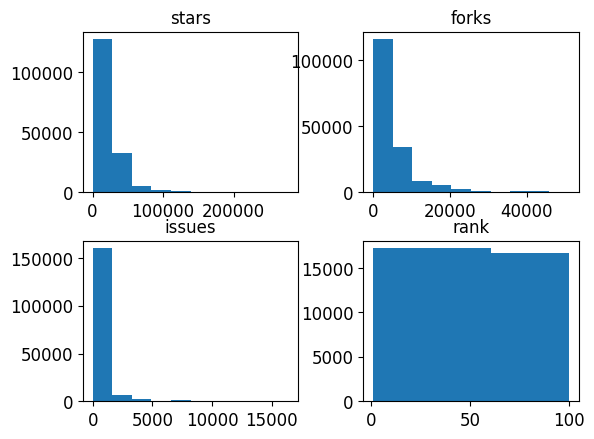

In [18]:
#distribuci√≥n de las columnas n√∫mericas
numerical_col = list(df_cardinalidad["Tipo de dato"][df_cardinalidad["Tipo de dato"] == "numerical"].index)
df[numerical_col].hist(grid=False)

array([[<Axes: title={'center': 'last_commit'}>,
        <Axes: title={'center': 'date'}>]], dtype=object)

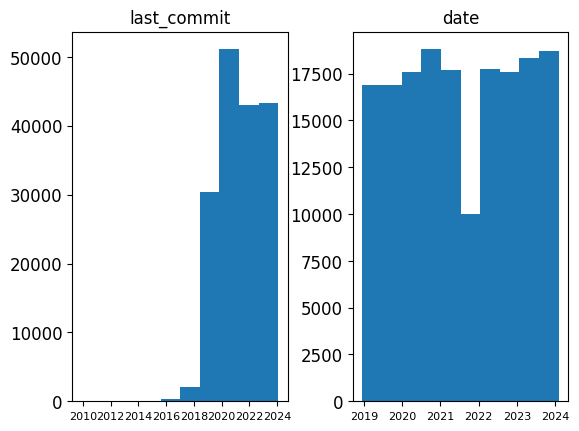

In [19]:
# distribuci√≥n de las columnas datetime
df[["last_commit", "date"]].hist(grid=False, xlabelsize=(8))

([], [])

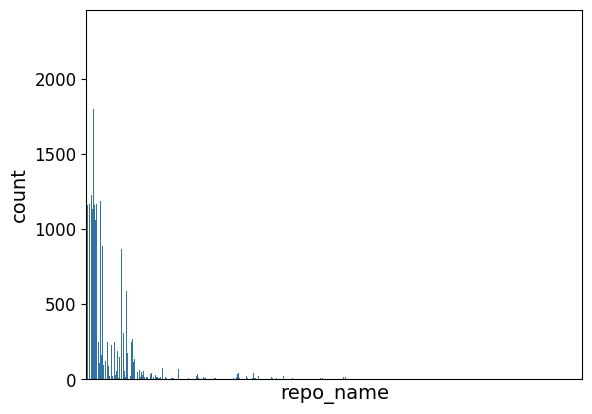

In [20]:
# distribuci√≥n repo_name
sns.countplot(df, x = "repo_name")
plt.xticks([])

([], [])

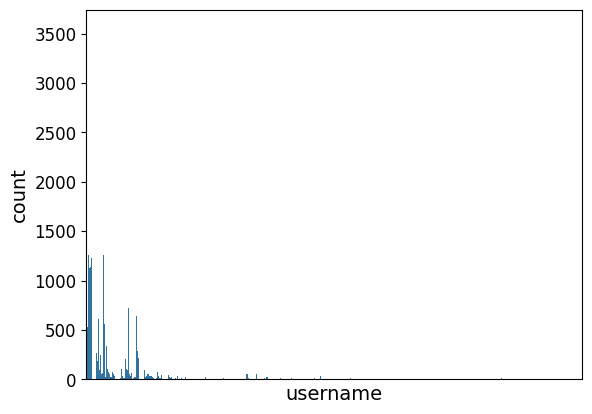

In [21]:
# distribuci√≥n username
sns.countplot(df, x = "username")
plt.xticks([])

([], [])

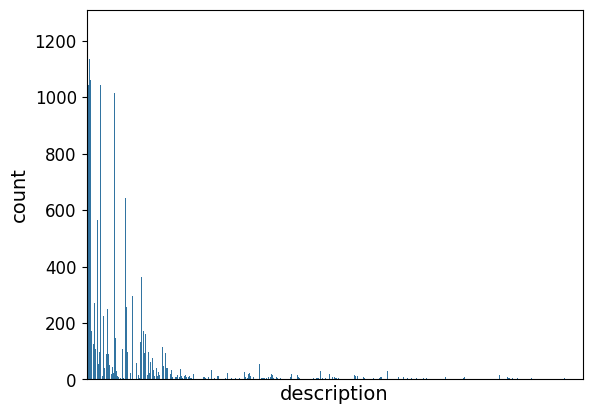

In [22]:
# distribuci√≥n descripci√≥n
sns.countplot(df, x = "description")
plt.xticks([])

Conclusiones del an√°lisis univariante:
- Ninguna variable se ajusta a la normal, la distribuci√≥n de todas ellas difiere bastante de una campana gaussiana, por lo tanto no procedimos a realizar comprobaciones estad√≠sticas.
- La mayor√≠a de variables tienden a tener una cola hacia la izquierda, lo que indica que hay muchos valores que se repiten poco y probablemente alg√∫n outlier o valor at√≠pico muy por encima de la media/moda/mediana.
- La √∫nica variable distribuida homogeneamente es la variable *rank*. Pero a√∫n as√≠ se observa que hay m√°s valor en el ranking por debajo de 75.
- La variable *last commit* es la √∫nica con una cola hacia la derecha, puede deberse a que al ser una variable temporal seg√∫n se ha ido actualizando el dataset ha ido recogiendo mas informaci√≥n sobre los commits hechos.
- Nuestra variable target, *forks*, presenta una cola a la izquierda con un peque√±o repunte entorno a los 40000.

### An√°lisis bivariante

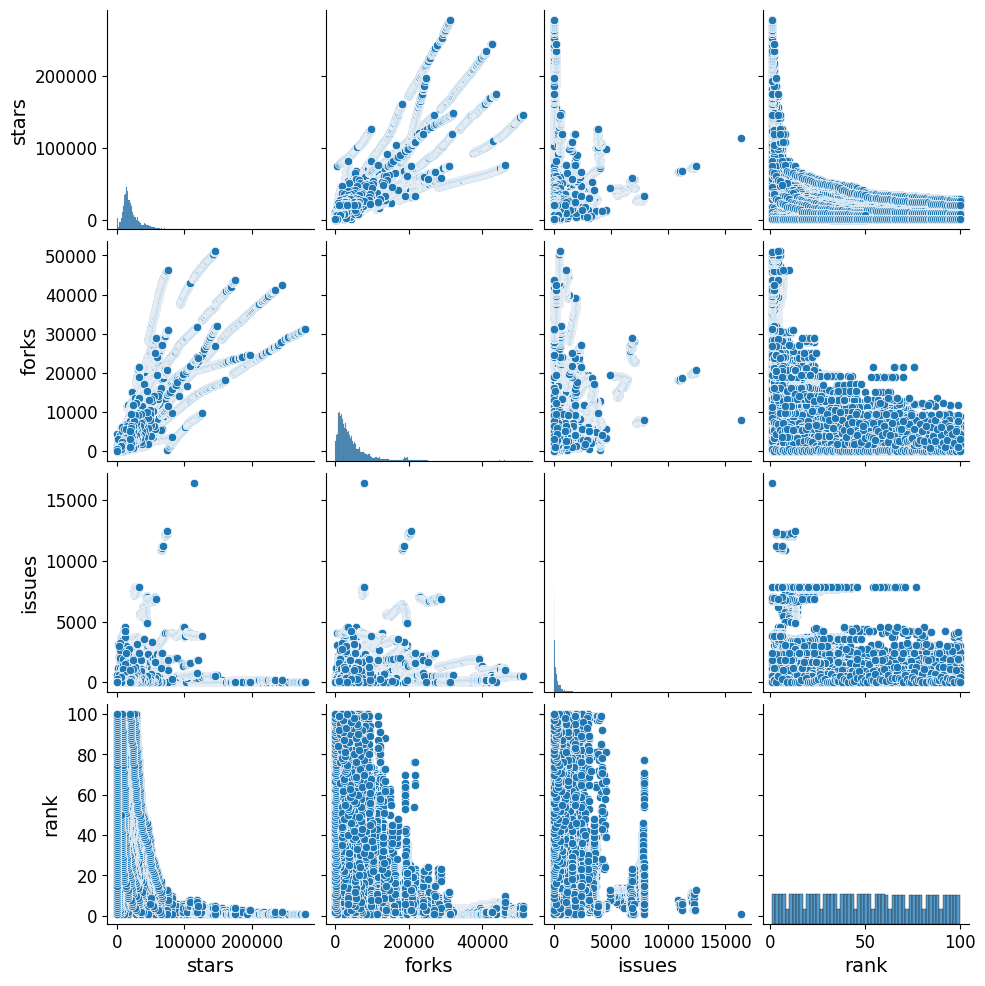

In [23]:
sns.pairplot(df[numerical_col])

<Axes: >

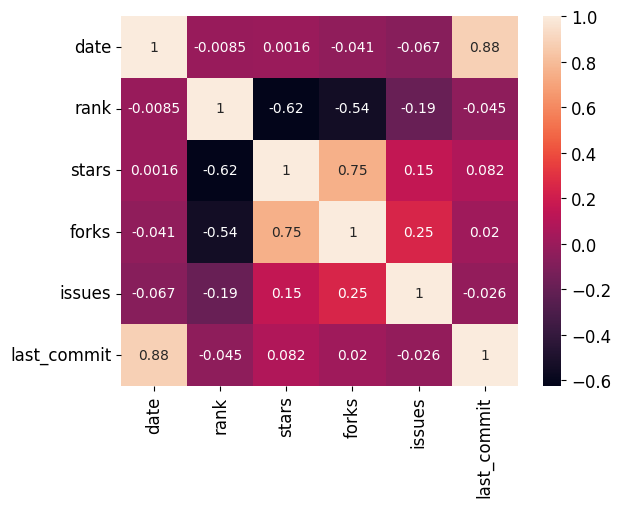

In [24]:
sns.heatmap(df[['date', 'rank', 'stars', 'forks', 'issues',
       'last_commit']].corr(), annot=True)

El an√°lisis bivariante so se va a relizar con las columnas que presentan una gran correlaci√≥n con la target mientras que el resto se a√±adir√°n al an√°lisis multivariante.

- Destacamos la correlaci√≥n de *forks* con *stars* y con *top*/*rank*.
- Tambi√©n cabe destacar la correlaci√≥n entre s√≠ de las variables previamente mentadas por su correlaci√≥n con la target.
- Otra correlaci√≥n que llama la atenci√≥n es entre las variables *date* y *last_commit*. Es posible colinealidad.

Adem√°s, vamos a crear dos columnas nuevas moment√°neamente para facilitar el proceso de graficado. Una que agrupar√° las filas de 20 en 20 seg√∫n ranking y otra que agrupar√° las filas por el a√±o de entrada. 

In [25]:
# agrupaci√≥n rank -> top
df_1 = df.copy()

df_1["top"] = range(len(df_1))

#top20
df_1["top"].loc[list(df_1[df_1["rank"] <= 20].index)] = 20

#top40
top_20_mas = list(df_1[df_1["rank"] > 20].index)
top_40_menos = list(df_1[df_1["rank"] < 41].index)
top_20_40 = [x for x in top_20_mas if x in top_40_menos]
df_1["top"].loc[top_20_40] = 40

#top60
top_40_mas = list(df_1[df_1["rank"] > 40].index)
top_60_menos = list(df_1[df_1["rank"] < 61].index)
top_40_60 = [x for x in top_40_mas if x in top_60_menos]
df_1["top"].loc[top_40_60] = 60

#top80
top_60_mas = list(df_1[df_1["rank"] > 60].index)
top_80_menos = list(df_1[df_1["rank"] < 81].index)
top_60_80 = [x for x in top_60_mas if x in top_80_menos]
df_1["top"].loc[top_60_80] = 80


#top100
top_100 = list(df_1[df_1["rank"] > 80].index)
df_1["top"].loc[top_100] = 100

df_1["top"].value_counts()

top
20     34440
40     34440
60     34440
80     33480
100    33480
Name: count, dtype: int64

In [26]:
#agrupaci√≥n a√±os date
df_1["year"] = df_1["date"].dt.year
df_1["year"].value_counts()

year
2023    36120
2020    35500
2022    34360
2019    32900
2021    26800
2024     3300
2018     1300
Name: count, dtype: int64

In [27]:
## agrupando por a√±os last commit
df_1["lc_year"] = df_1["last_commit"].dt.year
df_1["lc_year"].value_counts()

lc_year
2020    36193
2022    35929
2019    33705
2023    29673
2021    28106
2018     3173
2024     1555
2017     1449
2016      301
2015      108
2014       42
2013       30
2012       14
2011        1
2009        1
Name: count, dtype: int64

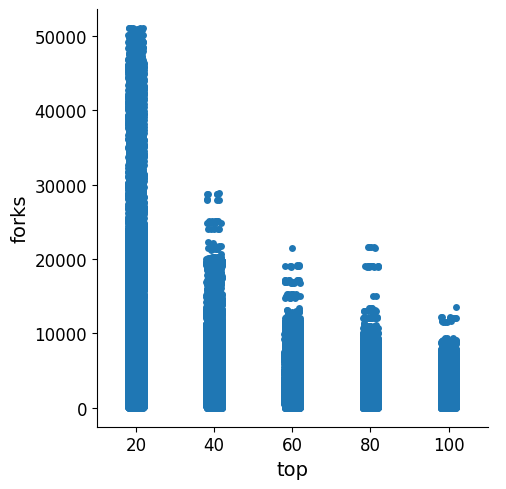

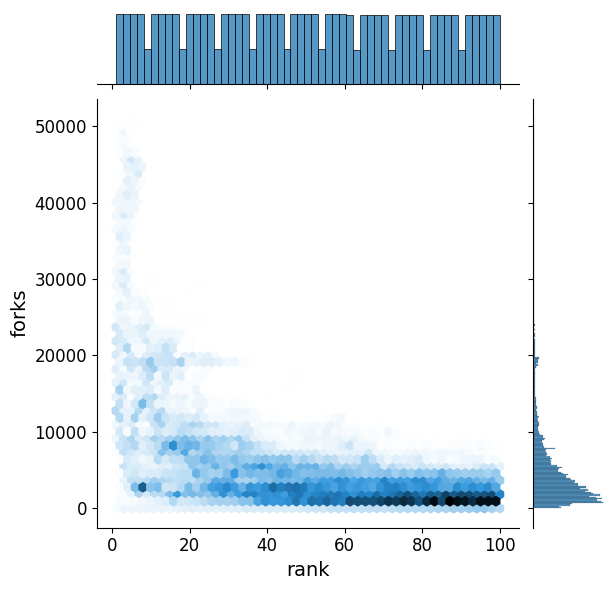

In [28]:
# forks y top/rank
sns.catplot(df_1, y= "forks", x ="top")
sns.jointplot(df_1, y= "forks", x ="rank", kind="hex")

<Axes: xlabel='stars', ylabel='forks'>

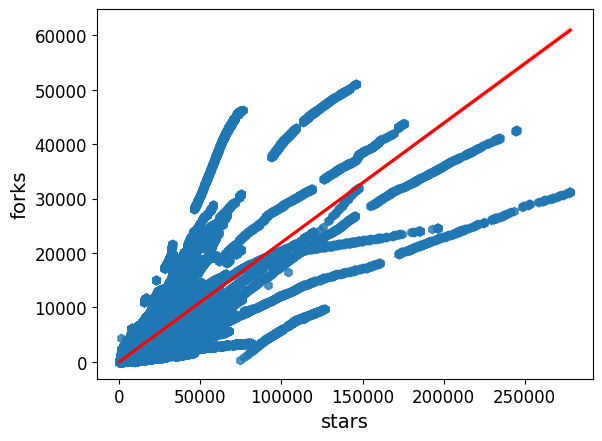

In [29]:
#stars y forks

sns.regplot(df_1, x="stars", y="forks", line_kws=dict(color="r"), marker="h")

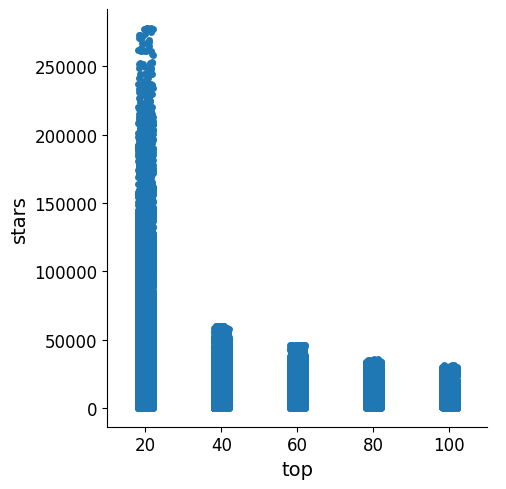

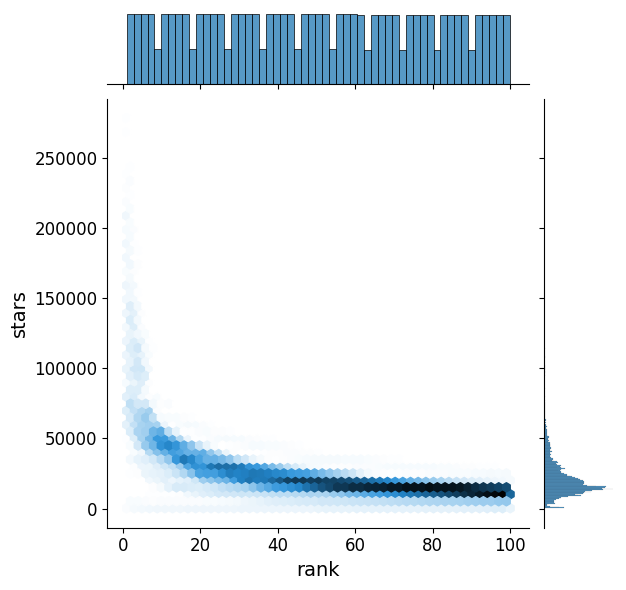

In [30]:
#stars y top/rank

sns.catplot(df_1, y= "stars", x ="top")
sns.jointplot(df_1, y= "stars", x ="rank", kind="hex")

### An√°lisis Multivariante

<Axes: xlabel='stars', ylabel='forks'>

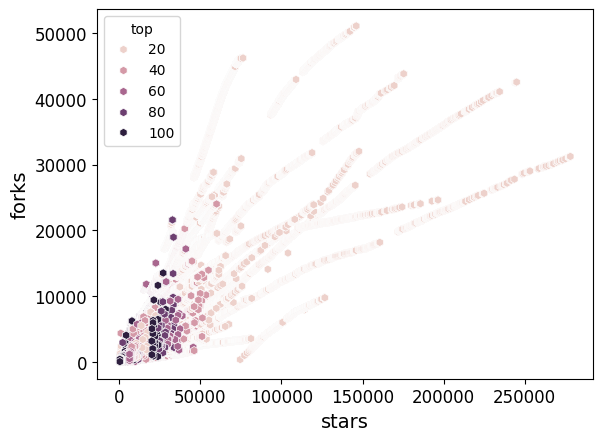

In [31]:
#stars-forks-top

sns.scatterplot(df_1, x="stars", y="forks", marker="h", hue="top")

<Axes: xlabel='year', ylabel='forks'>

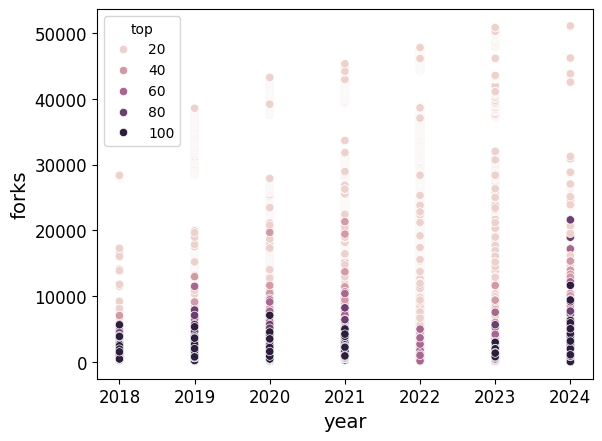

In [32]:
#stars - forks - top
sns.scatterplot(df_1, x="year", y="forks", hue="top")

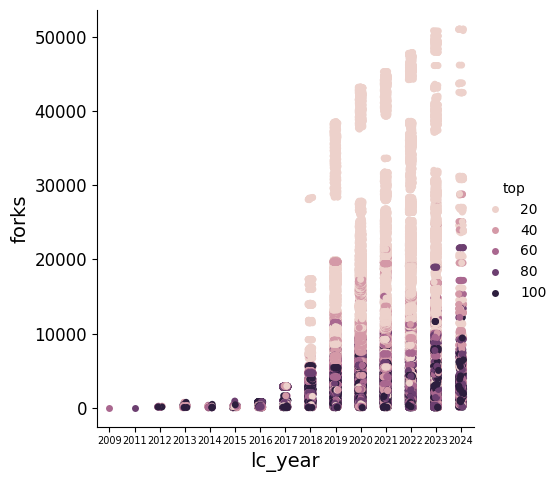

In [33]:
# last_commit, forks, top
sns.catplot(df_1, x="lc_year", y="forks", hue="top")
plt.xticks(size = 7);

Conclusiones del an√°lisis multivariante:
- Cuantas m√°s alto en el ranking y m√°s estrellas tenga un repositorio, m√°s forks se hacen del mismo.
- Pese a que no haya una fuerte correlaci√≥n, se puede observar cierta tendencia en la cual tanto en la fecha de adici√≥n de la entrada al dataset, como el √∫ltimo commit a dicho repositorio influyen en el ranking y por lo tanto en la cantidad de forks realizados.

### Conclusiones generales tras la primera exploraci√≥n y el EDA

El dataset est√° bastante limpio y excepto las columnas categ√≥ricas, el resto no necesitan demasiado preprocesamiento.

Las variables num√©ricas a priori mas importantes, con mas correlaci√≥n con nuestra variable target (*forks*), son *stars* y *rank*. Tiene sentido pues cuanto mejor valorado est√©, y m√°s popular sea el repositorio, m√°s forks deber√≠a tener.

Por √∫ltimo, pese a la poca correlaci√≥n que existe entre las variables *last_commit* y *date* con el target, se observa un patr√≥n en ambas variables que indica que cuanto mas cerca del presente este la fecha de subida de la entrada y el √∫ltimo commit, tiende a tener mas forks. Adem√°s se puede intuir cierta colinealidad entre las dos variables.

Sobre las variables categ√≥ricas, una vez sean tratadas podremos analizarlas.

## 2. Limpieza

### Valores nulos

Como vimos en la exploraci√≥n incial, el √∫nico feature con valores nulos es *description*. Al ser menos de un 1% de los datos y adem√°s una variable imposible de imputar, procedemos a eliminar estos valores nulos.

In [34]:
df.dropna(axis=0, inplace=True)

In [35]:
df.shape

(168687, 9)

### Valores At√≠picos y outliers

Tras lo visto en el EDA, no existen valores at√≠picos (imposibles o incoherentes). En cuanto a los outliers, se siente que estos valores aportan mas informaci√≥n √∫til que ruido, por lo tanto se van a mantener. 

## 3. Feature Engineering

### days since last commit

En este apartado, vamos a crear un nuevo feature *days since last commit (days_since_lc)*. Ya que en el EDA observamos que pese a la poca correlaci√≥n entre la variable *last_commit* y la target, se observaba cierta tendencia ascendente entre la cantida de forks y la proximidad con el presente del √∫ltimo commit. Con este nuevo feature, pretedemos mantener esa informaci√≥n mientras se evita la posible colinealidad que existe entre las variables *last_commmit* y *date*.

In [36]:
# Ajustando el formato de last commit a date 
lc_y_m_d = [x[0] for x in df["last_commit"].astype(str).str.split(" ")]
df["last_commit"] = lc_y_m_d
df["last_commit"] = pd.to_datetime(df["last_commit"])

# Creando el feature nuevo
df["days_since_lc"] = (df["date"] - df["last_commit"]) / timedelta(days=1)
df.head() 

date  rank             repo_name  stars  forks     username  issues  \
0 2018-12-18     1        awesome-python  58777  11448        vinta     439   
1 2018-12-18     2  system-design-primer  53575   7570  donnemartin      68   
2 2018-12-18     3                models  46039  28053   tensorflow    1324   
3 2018-12-18     4           public-apis  45373   4707    toddmotto       5   
4 2018-12-18     5            youtube-dl  44956   7820          rg3    2566   

  last_commit                                        description  \
0  2018-12-13  A curated list of awesome Python frameworks, l...   
1  2018-12-18  Learn how to design large-scale systems. Prep ...   
2  2018-12-18          Models and examples built with TensorFlow   
3  2018-12-18  A collective list of free APIs for use in soft...   
4  2018-12-18  Command-line program to download videos from Y...   

   days_since_lc  
0            5.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

Ahora procederemos a realizar un peque√±o an√°lisis exploratorio de esta columna nueva.

<Axes: >

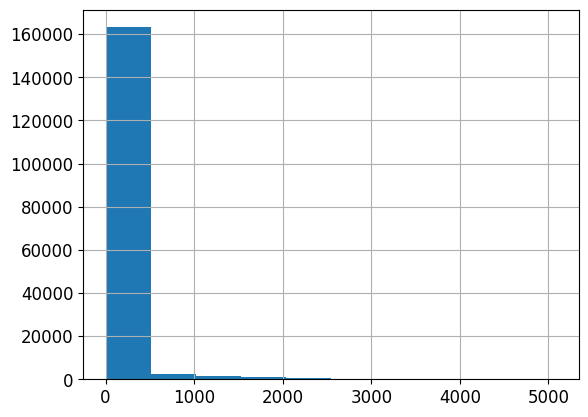

In [37]:
df["days_since_lc"].hist()

<Axes: xlabel='days_since_lc', ylabel='forks'>

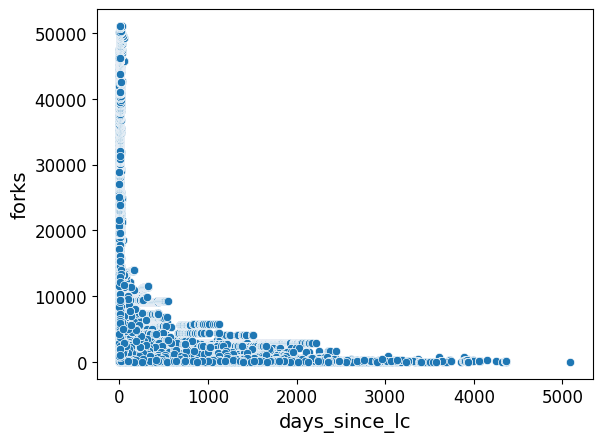

In [38]:
sns.scatterplot(df, x ="days_since_lc", y="forks")

<Axes: >

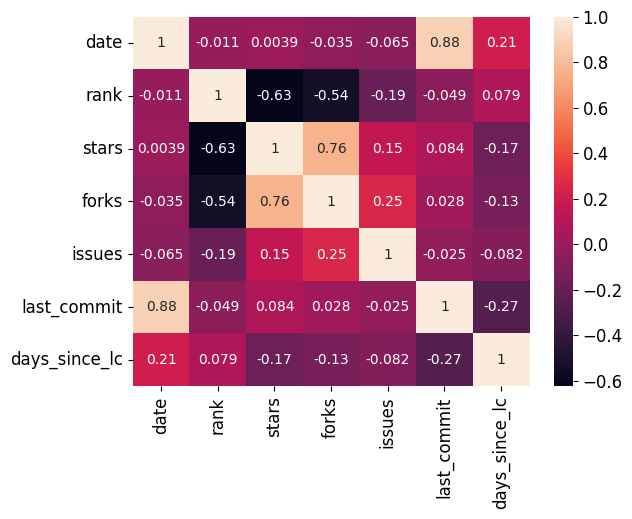

In [39]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True)

Se puede observar en las gr√°ficas que *days_since_lc* tiene un comportamiento y similar a *last_commit* y ademas hemos eliminado la posible colinealidad con la variable *date*. Por lo tanto vamos a eliminar el feature *last_commit*. 

In [40]:
df.drop(columns="last_commit", inplace=True)

### repos_by_user

La columna *username* es una variable categ√≥rica, con informaci√≥n sobre el autor del repositorio. Como vimos en la exploraci√≥n inicial, no coincide el n√∫mero de users con el la cantidad de repositorios √∫nicos, por lo tanto tiene que haber autores con mas de un repostorio. El trabajo de feature engineering que vamos a hacer con esta variable es crear una columna la cual nos indique si es un repostorio de un autor "famoso".

In [41]:
# Comprobando que haya usuarios con m√°s de un repositorio
df.groupby("username")["repo_name"].value_counts()

username   repo_name                   
0k         shyaml                             1
0rpc       zerorpc-python                     1
0voice     interview_internal_reference     988
0x5e       wechat-deleted-friends             2
0xAX       linux-insides                   1134
                                           ... 
zulip      zulip                            615
zyantific  IDASkins                           1
zygmuntz   hyperband                          1
           phraug                             1
zzw922cn   Automatic_Speech_Recognition       1
Name: count, Length: 4265, dtype: int64

In [42]:
#usuarios con m√°s de un repo
popular_users = list(df["username"].value_counts()[df["username"].value_counts() > 1].index)

#usuarios por repositorio
n_repos = [df[df["username"] == x]["repo_name"].nunique() for x in popular_users]

# Creando la columna repos_by_user
df = pd.merge(df, pd.DataFrame({'username':popular_users, 'repos_by_user':n_repos}), 'outer', on='username')

# rellenando lo NaNs que quedar√°, que son para los usuarios con solo un repositorio
df["repos_by_user"].fillna(1, inplace=True)

<Axes: >

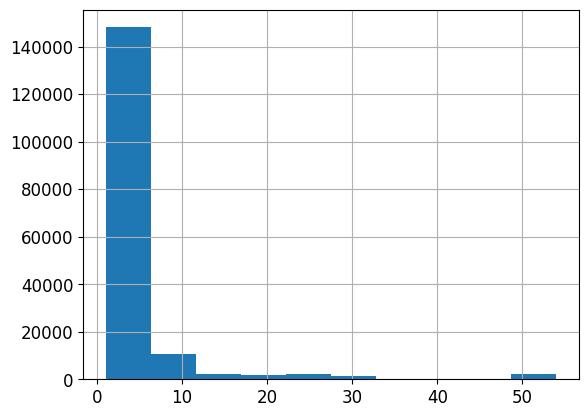

In [43]:
df["repos_by_user"].hist()

<Axes: xlabel='repos_by_user', ylabel='forks'>

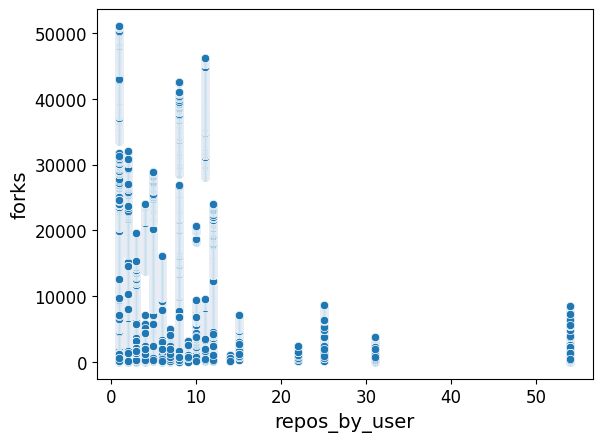

In [44]:
sns.scatterplot(df, x ="repos_by_user", y="forks")

Tras haber creado la columna *repos_by_user* y haber hecho un peque√±o an√°lisis exploratorio de la misma, se ve que existe cierta relaci√≥n inversa entre el n√∫mero de forks y los repositorios en el top del autor. A√∫n as√≠, sigue quedando la duda de si el propio nombre del autor influye.

## 4. Tranformaciones y escalado

### NLP

Para poder extraer mas informaci√≥n de la descripci√≥n, vamos a realizar la un an√°lisis de sentimientos de la misma utilizando la libreria NLTK. Adem√°s tambi√©m se realizar√° la vectorizaci√≥n de los textos para posteriormente agruparlos por temas tras una clusterizaci√≥n

In [45]:
# Instanciando el an√°lisis de sentimiento
sia = SentimentIntensityAnalyzer()

# Creando las columnas de an√°lisis de sentimiento
res = {}

for i, x in df.iterrows():
    des = x["description"]
    repo_name = x["repo_name"]
    res[repo_name] = sia.polarity_scores(des)

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index":"repo_name"})
vaders = vaders.merge(df, how="left")

vaders.head()

repo_name  neg  neu  pos  compound       date  rank  \
0                        shyaml  0.0  1.0  0.0       0.0 2023-08-09    50   
1                zerorpc-python  0.0  1.0  0.0       0.0 2023-11-20    54   
2  interview_internal_reference  0.0  1.0  0.0       0.0 2019-07-23    92   
3  interview_internal_reference  0.0  1.0  0.0       0.0 2019-07-25    62   
4  interview_internal_reference  0.0  1.0  0.0       0.0 2019-07-27    71   

   stars  forks username  issues  \
0    750     57       0k      13   
1   3115    416     0rpc      46   
2  10536   2730   0voice       7   
3  12382   3284   0voice       6   
4  13024   3470   0voice       7   

                                       description  days_since_lc  \
0                            YAML for command line          115.0   
1                               zerorpc for python           61.0   
2  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            0.0   
3  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            2.0   
4  2019Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ            1.0   

   repos_by_user  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0

Ahora vamos a realizar un peque√±o an√°lisis exploratorio de las columnas que hemos a√±adido.

In [46]:
df = vaders.copy()

<Axes: xlabel='compound', ylabel='Count'>

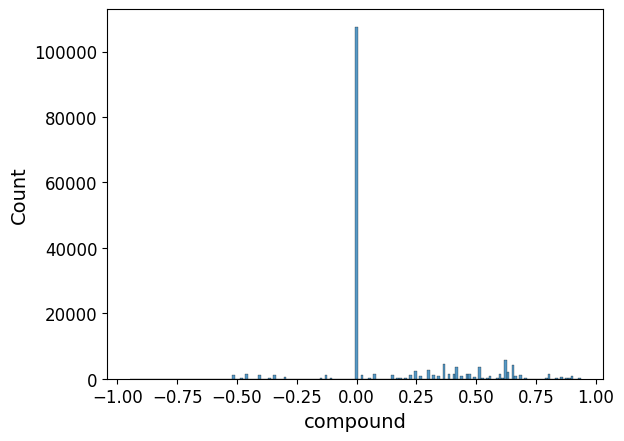

In [47]:
sns.histplot(df, x = "compound")

<Axes: xlabel='neu', ylabel='Count'>

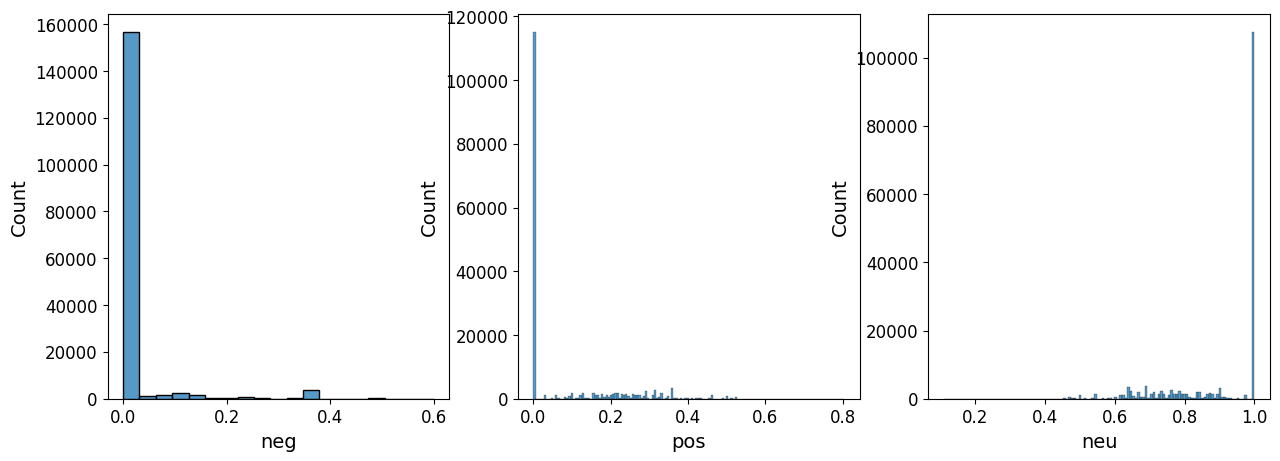

In [48]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(df, x = "neg", ax=axs[0])
sns.histplot(df, x = "pos", ax=axs[1])
sns.histplot(df, x = "neu", ax=axs[2])

<Axes: >

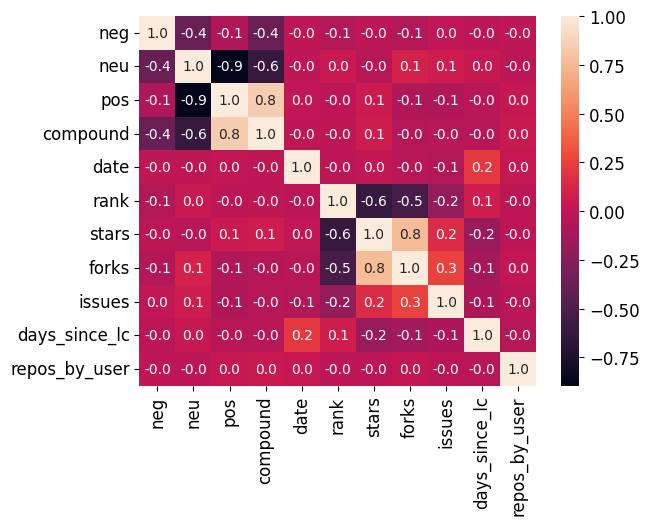

In [49]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, fmt=".1f")

Observamos que las columnas de sentimiento tienen mucha correlaci√≥n entre ellas, por ello nos vamos a quedar solo con *compound* puesto que es una aglomeraci√≥n de las 3. 

In [50]:
df.drop(columns=['neg', 'neu', 'pos'], inplace=True)

<Axes: xlabel='compound', ylabel='forks'>

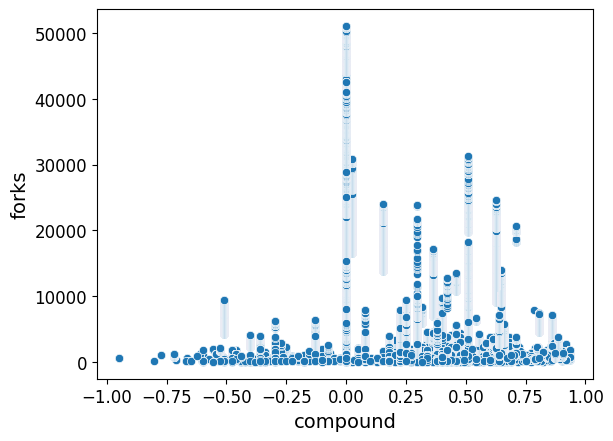

In [51]:
sns.scatterplot(df, x ="compound", y="forks")

Se pueder ver una tendencia en la relaci√≥n entre el sentimiento de la descripci√≥n y el n√∫mero de forks del repositorio, que el sentimiento sea neutro suele favorecer a la cantidad de forks, y en cuanto se polariza se ve mucho m√°s resentido si el sentimiento es negativo.

Eliminamos los signos de puntuaci√≥n y emojis del los textos.

In [52]:
signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¬ø)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_description(des):
    return signos.sub('', des.lower())

df['description'] = df['description'].apply(signs_description)
df['description'].head()

0                          yaml for command line
1                             zerorpc for python
2    Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ
3    Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ
4    Âπ¥ÊúÄÊñ∞ÊÄªÁªìÔºåÈòøÈáåÔºåËÖæËÆØÔºåÁôæÂ∫¶ÔºåÁæéÂõ¢ÔºåÂ§¥Êù°Á≠âÊäÄÊúØÈù¢ËØïÈ¢òÁõÆÔºå‰ª•ÂèäÁ≠îÊ°àÔºå‰∏ìÂÆ∂Âá∫È¢ò‰∫∫ÂàÜÊûêÊ±áÊÄª„ÄÇ
Name: description, dtype: object

In [53]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text.lower())


df['description'] = df['description'].apply(remove_emojis)
df['description'].head()

0    yaml for command line
1       zerorpc for python
2                         
3                         
4                         
Name: description, dtype: object

Ahora procedemos a elimnar la stopwords

In [54]:
stopwords_words = stopwords.words('english')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in stopwords_words])

df['description'] = df['description'].apply(remove_stopwords)
df.head()

repo_name  compound       date  rank  stars  forks  \
0                        shyaml       0.0 2023-08-09    50    750     57   
1                zerorpc-python       0.0 2023-11-20    54   3115    416   
2  interview_internal_reference       0.0 2019-07-23    92  10536   2730   
3  interview_internal_reference       0.0 2019-07-25    62  12382   3284   
4  interview_internal_reference       0.0 2019-07-27    71  13024   3470   

  username  issues        description  days_since_lc  repos_by_user  
0       0k      13  yaml command line          115.0            1.0  
1     0rpc      46     zerorpc python           61.0            1.0  
2   0voice       7                               0.0            1.0  
3   0voice       6                               2.0            1.0  
4   0voice       7                               1.0            1.0

El siguiente paso en nuestro proceso es lemmatizar y vectorizar los textos.

In [55]:
def word_lemmatizer(x):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in x.split()])

df['description'] = df['description'].apply(word_lemmatizer)
df['description'].head()

0    yaml command line
1       zerorpc python
2                     
3                     
4                     
Name: description, dtype: object

In [56]:
vectorizer_c = CountVectorizer()
vectorizer_c.fit(df['description'])

X_baseline_c = vectorizer_c.transform(df['description'])

Con las descripciones ya vectorizadas vamos a realizar una clusterizaci√≥n de las mismas para poder agruparlas y encontrar patrones que nos ayuden a mejorar el modelo.

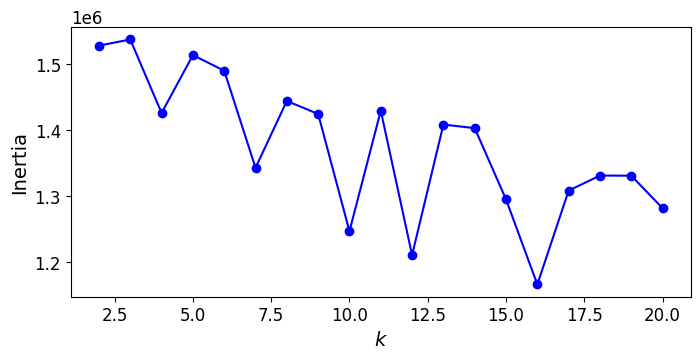

In [156]:
# Buscando el K √≥ptimo
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(X_baseline_c)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Gr√°fica de inercia
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)


plt.show()

In [38]:
silhouette_scores = [silhouette_score(X_baseline_c, model.labels_)
                     for model in kmeans_per_k[2:12]]

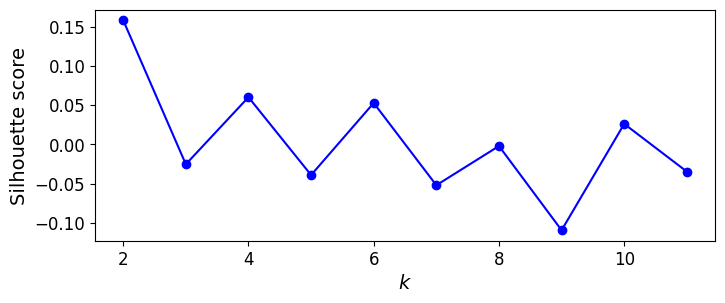

In [39]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

El mejor valor para el par√°metro k es 8. Creamos el modelo para poder clusterizar

In [57]:
kmeans = MiniBatchKMeans(8, random_state=42).fit(X_baseline_c)

# a√±adiendo la columna cluster al dataframe
df['cluster'] = kmeans.labels_
df.head()

repo_name  compound       date  rank  stars  forks  \
0                        shyaml       0.0 2023-08-09    50    750     57   
1                zerorpc-python       0.0 2023-11-20    54   3115    416   
2  interview_internal_reference       0.0 2019-07-23    92  10536   2730   
3  interview_internal_reference       0.0 2019-07-25    62  12382   3284   
4  interview_internal_reference       0.0 2019-07-27    71  13024   3470   

  username  issues        description  days_since_lc  repos_by_user  cluster  
0       0k      13  yaml command line          115.0            1.0        3  
1     0rpc      46     zerorpc python           61.0            1.0        4  
2   0voice       7                               0.0            1.0        3  
3   0voice       6                               2.0            1.0        3  
4   0voice       7                               1.0            1.0        3

Es posible explorar los clusters, para ello vamos a crear un df para cada cluster y examinar cuales son las palabras que m√°s se repiten en cada uno de ellos, de esta manera poder entender porque tem√°ticas o en que se ha basado el modelo kmeans para las agrupaciones.

In [40]:
# Creando un diccionario con los clusters
cluster_texts_dict = {i: [] for i in range(8)}
for index, row in df.iterrows():
    cluster_texts_dict[row['cluster']].append(row['description'])

cluster_data = [{'cluster_id': cluster_id, 'text': text} for cluster_id, texts in cluster_texts_dict.items() for text in texts]

In [41]:
# Pasando el diccionario a dataframe
cluster_df = pd.DataFrame(cluster_data)

# Se elminan los duplicados puesto que hay descripciones repetidas de los repositiorios que aparecen m√°s de una vez
cluster_df.drop_duplicates(inplace=True)

#Un dataframe por cluster
cluster_0 = cluster_df[cluster_df["cluster_id"] == 0]
cluster_1 = cluster_df[cluster_df["cluster_id"] == 1]
cluster_2 = cluster_df[cluster_df["cluster_id"] == 2]
cluster_3 = cluster_df[cluster_df["cluster_id"] == 3]
cluster_4 = cluster_df[cluster_df["cluster_id"] == 4]
cluster_5 = cluster_df[cluster_df["cluster_id"] == 5]
cluster_6 = cluster_df[cluster_df["cluster_id"] == 6]
cluster_7 = cluster_df[cluster_df["cluster_id"] == 7]

In [42]:
# Creando una funci√≥n pars tokezinar las palabras de las descripciones y poder ver las mas frecuentes
def tokenize_text(text):
    return word_tokenize(text)

In [43]:
# An√°lisis cluster 0

cluster_0['tokenized_column'] = cluster_0['text'].apply(tokenize_text)

cluster_0_words = []

for x in cluster_0["tokenized_column"]:
    cluster_0_words.append(x)

concatenated_cluster0 = [item for sublist in cluster_0_words for item in sublist]

word_freq = Counter(concatenated_cluster0)

word_freq.most_common(10)

[('data', 77),
 ('&', 8),
 ('python', 8),
 ('database', 6),
 ('science', 5),
 ('analysis', 5),
 ('image', 4),
 ('text', 4),
 ('ai', 4),
 ('store', 4)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre an√°lisis de bases de datos, textos e imagenes.

In [44]:
# An√°lisis cluster 1

cluster_1['tokenized_column'] = cluster_1['text'].apply(tokenize_text)

cluster_1_words = []

for x in cluster_1["tokenized_column"]:
    cluster_1_words.append(x)

concatenated_cluster1 = [item for sublist in cluster_1_words for item in sublist]

word_freq = Counter(concatenated_cluster1)

word_freq.most_common(10)

[('learning', 63),
 ('pytorch', 58),
 ('deep', 36),
 ('model', 28),
 ('state-of-the-art', 27),
 ('implementation', 19),
 ('language', 19),
 ('processing', 18),
 ('nlp', 18),
 ('natural', 17)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre modelos de deep learning, especialmente de NLP. 

In [46]:
# An√°lisis cluster 2
cluster_2['tokenized_column'] = cluster_2['text'].apply(tokenize_text)

cluster_2_words = []

for x in cluster_2["tokenized_column"]:
    cluster_2_words.append(x)

concatenated_cluster2 = [item for sublist in cluster_2_words for item in sublist]

word_freq = Counter(concatenated_cluster2)

word_freq.most_common(10)

[('api', 128),
 ('python', 41),
 ('chatgpt', 20),
 ('using', 14),
 ("'s", 14),
 ('client', 14),
 ('http', 12),
 ('support', 11),
 ('wrapper', 11),
 ('json', 10)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre aplicaciones y el soporte de est√°s en l√≠nea. 

In [47]:
# An√°lisis cluster 3

cluster_3['tokenized_column'] = cluster_3['text'].apply(tokenize_text)

cluster_3_words = []

for x in cluster_3["tokenized_column"]:
    cluster_3_words.append(x)

concatenated_cluster3 = [item for sublist in cluster_3_words for item in sublist]

word_freq = Counter(concatenated_cluster3)

word_freq.most_common(10)

[('‚Äú', 269),
 ('‚Äù', 261),
 ('model', 250),
 ('learning', 218),
 ('implementation', 199),
 ('code', 182),
 ('network', 175),
 ('tool', 172),
 ('tensorflow', 167),
 ('framework', 165)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre modelos de aprendijaze e implementaci√≥n de redes neuronales.

In [48]:
# An√°lisis cluster 4

cluster_4['tokenized_column'] = cluster_4['text'].apply(tokenize_text)

cluster_4_words = []

for x in cluster_4["tokenized_column"]:
    cluster_4_words.append(x)

concatenated_cluster4 = [item for sublist in cluster_4_words for item in sublist]

word_freq = Counter(concatenated_cluster4)

word_freq.most_common(10)

[('python', 864),
 ('library', 169),
 ('framework', 87),
 ('web', 58),
 ('-', 50),
 ('data', 49),
 ('learning', 47),
 ('client', 44),
 ('code', 42),
 ('written', 42)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre librerias para el trabajo de desarrollo web y el an√°lisis de datos.

In [49]:
# An√°lisis cluster 5

cluster_5['tokenized_column'] = cluster_5['text'].apply(tokenize_text)

cluster_5_words = []

for x in cluster_5["tokenized_column"]:
    cluster_5_words.append(x)

concatenated_cluster5 = [item for sublist in cluster_5_words for item in sublist]

word_freq = Counter(concatenated_cluster5)

word_freq.most_common(10)

[('learning', 12),
 ('machine', 8),
 ('deep', 4),
 ('/', 4),
 ('scratch', 3),
 ('bare', 3),
 ('bone', 3),
 ('implementation', 3),
 ('model', 3),
 ('algorithm', 3)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre modelos de machine learning e implementaci√≥n de algoritmos

In [50]:
cluster_6['tokenized_column'] = cluster_6['text'].apply(tokenize_text)

cluster_6_words = []

for x in cluster_6["tokenized_column"]:
    cluster_6_words.append(x)

concatenated_cluster6 = [item for sublist in cluster_6_words for item in sublist]

word_freq = Counter(concatenated_cluster6)

word_freq.most_common(10)

[('system', 4),
 ('application', 3),
 ('deploy', 3),
 ('ansible', 2),
 ('radically', 2),
 ('simple', 2),
 ('automation', 2),
 ('platform', 2),
 ('make', 2),
 ('easier', 2)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre sistemas para la automatizaci√≥n y la facilitaci√≥n del despliegur de aplicaciones.

In [51]:
cluster_7['tokenized_column'] = cluster_7['text'].apply(tokenize_text)

cluster_7_words = []

for x in cluster_7["tokenized_column"]:
    cluster_7_words.append(x)

concatenated_cluster7 = [item for sublist in cluster_7_words for item in sublist]

word_freq = Counter(concatenated_cluster7)

word_freq.most_common(10)

[('security', 4),
 ('application', 3),
 ('mobile', 3),
 ('owasp', 2),
 ('cheat', 2),
 ('sheet', 2),
 ('testing', 2),
 ('series', 1),
 ('created', 1),
 ('provide', 1)]

Las palabras m√°s frecuentes del cluster nos indican que el modelo kmeans ha creado este cluster agrupando descripciones que tratan sobre la seguridad y pruebas y trabajo en apliaciones m√≥viles.

<Axes: xlabel='cluster', ylabel='Count'>

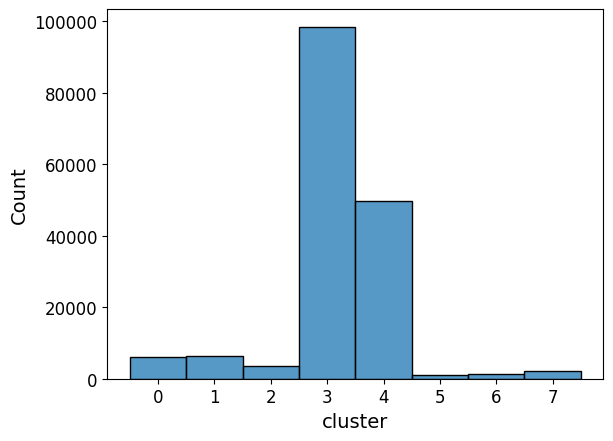

In [53]:
# Distribuci√≥n de los cluster

sns.histplot(df, x="cluster", discrete=True)

La mayor√≠a de decripciones se encuentran agrupadas en los cluster 3 y 4, lo que nos quiere indicar que principalmente los repositorios estan orientados en redes neuronales y el desarrollo web.

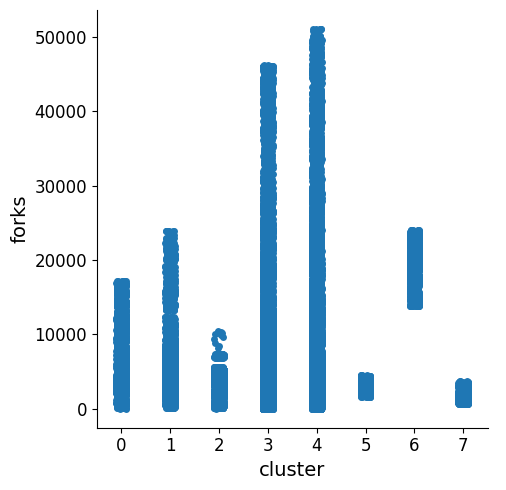

In [52]:
# Cluster vs forks
sns.catplot(data=df, x="cluster", y="forks")

A parte de ser los cluster con mayor n√∫mero de repostirios, tambi√©n son los que contiene los repositorios con maas forks. Por lo que nos deja intuir la popularidad de dichos temas.

<Axes: xlabel='cluster', ylabel='compound'>

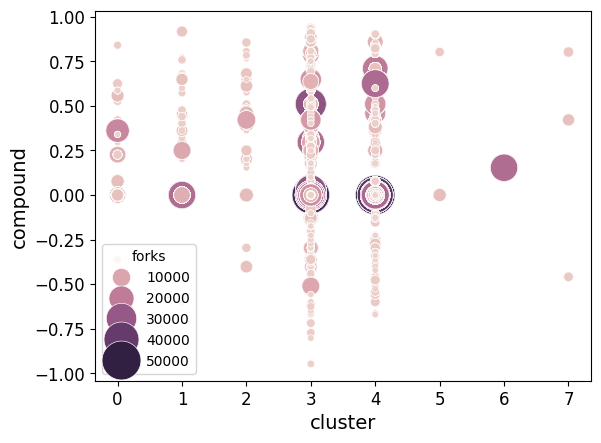

In [54]:
#Relaci√≥n cluster-sentimiento en funci√≥n de los forks
sns.scatterplot(data=df, y="compound", x="cluster", hue="forks", size="forks", sizes=(20, 800))

En cuanto al sentimiento, como vimos anteriormente, el sentimiento neutro suele favorecer a la canrtidad de forks.

### Label Encoder

Vamos a tranformar las dos columnas que quedan utilizando el m√©todo label encoder, puesto que crear dummies es inviable con la cantidad de √∫nicos que tienen.

In [58]:
# instanciando el label encoder
le = LabelEncoder()

#eliminando la columna descripci√≥n pues ya tenemos el cluster que agrupa las descripciones
df = df.drop(columns=["description"])

df["repo_name"] = le.fit_transform(df["repo_name"])
df["username"] = le.fit_transform(df["username"])

df.head()

repo_name  compound       date  rank  stars  forks  username  issues  \
0       3536       0.0 2023-08-09    50    750     57         0      13   
1       4136       0.0 2023-11-20    54   3115    416         1      46   
2       2381       0.0 2019-07-23    92  10536   2730         2       7   
3       2381       0.0 2019-07-25    62  12382   3284         2       6   
4       2381       0.0 2019-07-27    71  13024   3470         2       7   

   days_since_lc  repos_by_user  cluster  
0          115.0            1.0        3  
1           61.0            1.0        4  
2            0.0            1.0        3  
3            2.0            1.0        3  
4            1.0            1.0        3

## Escalado

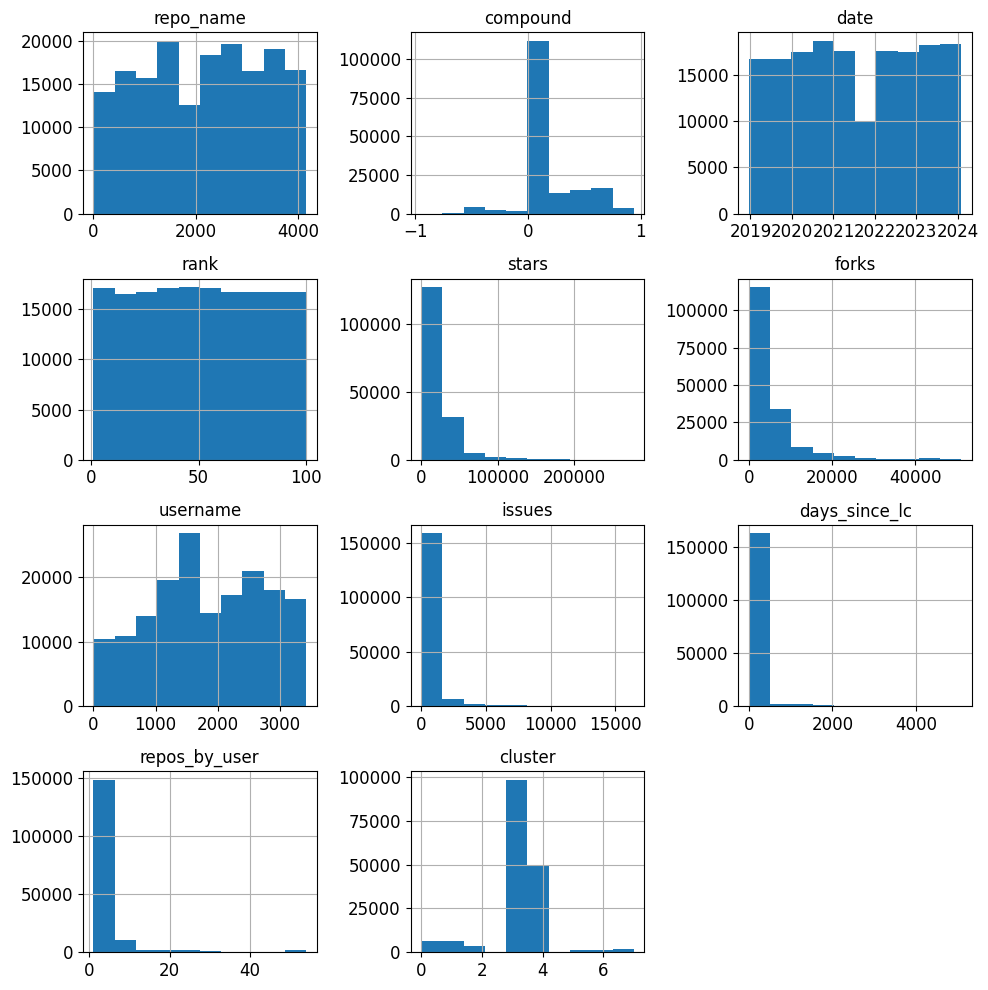

In [59]:
df.hist(figsize=(10,10))
plt.tight_layout()

Debido a las caracter√≠sticas de los features (no se ajustan a la normal, son variables discretas y hay outliers), el escalado ser√° realizado mediante el m√©todo ``RobustScaler``.

In [60]:
# Prerando la columna Date para poder escalarla
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

df.drop(columns="date", inplace=True)

In [61]:
RobEsc = RobustScaler()
esc_features = RobEsc.fit_transform(df[['repo_name', 'rank', 'stars', 'forks', 'username', 'issues',
       'days_since_lc', 'repos_by_user', 'day', 'month', 'year']])

df[['repo_name', 'rank', 'stars', 'forks', 'username', 'issues',
       'days_since_lc', 'repos_by_user', 'day', 'month', 'year']] = esc_features

df.head()

repo_name  compound      rank     stars     forks  username    issues  \
0   0.625844       0.0  0.000000 -1.184326 -0.707295 -1.203413 -0.354651   
1   0.915140       0.0  0.081633 -1.022450 -0.627447 -1.202730 -0.258721   
2   0.068949       0.0  0.857143 -0.514511 -0.112767 -1.202048 -0.372093   
3   0.068949       0.0  0.244898 -0.388159  0.010454 -1.202048 -0.375000   
4   0.068949       0.0  0.428571 -0.344216  0.051824 -1.202048 -0.372093   

   days_since_lc  repos_by_user  cluster       day     month  year  
0       6.222222            0.0        3 -0.466667  0.333333   1.0  
1       3.222222            0.0        4  0.266667  0.833333   1.0  
2      -0.166667            0.0        3  0.466667  0.166667  -1.0  
3      -0.055556            0.0        3  0.600000  0.166667  -1.0  
4      -0.111111            0.0        3  0.733333  0.166667  -1.0

## 5. Clusterizaci√≥n

Vamos a utilizar un modelo no supervidado como preprocesamiento para poder ajustar mejor las predicciones. En este caso nos hemos decantado por el ``kmeans-minibatch`` ya que nos facilitar√° el proceso de computaci√≥n.

In [62]:
# quitamos la target

df_cluster = df.drop(columns="forks") 

# Buscando el K √≥ptimo
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(df_cluster)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

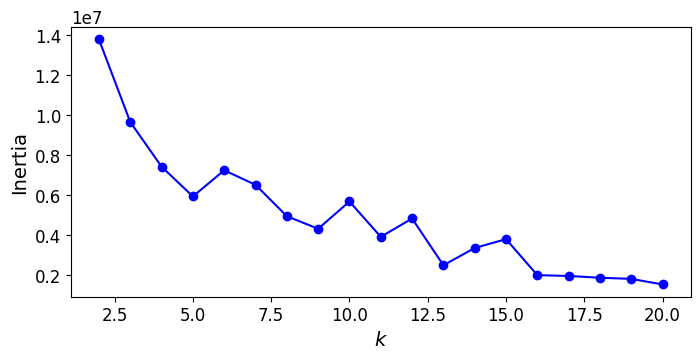

In [63]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)


plt.show()

El kmeans √≥ptimo es k=3.

In [64]:
# Instanciamos el modelo
kmeans = MiniBatchKMeans(3, random_state=42).fit(df_cluster)

In [65]:
# A√±adimos los cluster al df
clusterized = kmeans.predict(df_cluster)
df_cluster["forks"] = df["forks"]
df_cluster["cluster_result"] = clusterized

df_cluster.head()

repo_name  compound      rank     stars  username    issues  days_since_lc  \
0   0.625844       0.0  0.000000 -1.184326 -1.203413 -0.354651       6.222222   
1   0.915140       0.0  0.081633 -1.022450 -1.202730 -0.258721       3.222222   
2   0.068949       0.0  0.857143 -0.514511 -1.202048 -0.372093      -0.166667   
3   0.068949       0.0  0.244898 -0.388159 -1.202048 -0.375000      -0.055556   
4   0.068949       0.0  0.428571 -0.344216 -1.202048 -0.372093      -0.111111   

   repos_by_user  cluster       day     month  year     forks  cluster_result  
0            0.0        3 -0.466667  0.333333   1.0 -0.707295               2  
1            0.0        4  0.266667  0.833333   1.0 -0.627447               2  
2            0.0        3  0.466667  0.166667  -1.0 -0.112767               2  
3            0.0        3  0.600000  0.166667  -1.0  0.010454               2  
4            0.0        3  0.733333  0.166667  -1.0  0.051824               2

In [66]:
# Separamos por cluster para hacer un modelo por cada uno
df_cluster_0 = df_cluster[df_cluster["cluster_result"] == 0]
df_cluster_1 = df_cluster[df_cluster["cluster_result"] == 1]
df_cluster_2 = df_cluster[df_cluster["cluster_result"] == 2]

## 6. Modelo Cluster 0

### Separaci√≥n de los datos

In [67]:
# Separaci√≥n en train y test
train_0, test_0 = train_test_split(df_cluster_0, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_0.drop(columns="forks")
y = train_0["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [68]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.854849
ElasticNet            0.060734
Ridge                 0.854852
Lasso                 0.046129
DecisionTree          0.980826
RandomForest          0.988675
AdaBoost              0.831786
GradientBoost         0.967565
HistGradientBoosting  0.987413

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [69]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9890388518516725
hgb = 0.9887895680443769
rf = 0.9919025078579882


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [70]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [71]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.936666916450777
val r2: 0.936666916450777
MAE: 0.07201779403946056
MSE: 0.013076435503111038
MAPE: 1.2249143812307386


El modelo se ajusta correctamente a los datos de validaci√≥n.

### Test

In [72]:
# Separando en x_test e y_test
X_test = test_0.drop(columns="forks")
y_test = test_0["forks"]

In [73]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9498794548818074
MAE: 0.0676245318298273
MSE: 0.010487328716012559
MAPE: 0.4443816239838882


In [74]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9447010692709054
val 0.936666916450777
test 0.9498794548818074


El modelo no pierde eficacia tras pasarle los datos de test, por lo tanto es un modelo listo para usarse.

## 7. Modelo Cluster 1

### Separaci√≥n de datos

In [75]:
# Separaci√≥n en train y test
train_1, test_1 = train_test_split(df_cluster_1, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_1.drop(columns="forks")
y = train_1["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [76]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.891450
ElasticNet            0.155691
Ridge                 0.891471
Lasso                 0.144028
DecisionTree          0.984809
RandomForest          0.989279
AdaBoost              0.962109
GradientBoost         0.981844
HistGradientBoosting  0.984025

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [77]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9886138232590721
hgb = 0.9870231612905915
rf = 0.990791541831202


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [78]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [79]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9728159320134669
val r2: 0.9728159320134669
MAE: 0.022850823622525815
MSE: 0.0016493258381129554
MAPE: 0.040001338051548214


El modelo se ajusta correctamente a los datos de validaci√≥n.

### Test

In [80]:
# Separando en x_test e y_test
X_test = test_1.drop(columns="forks")
y_test = test_1["forks"]

In [81]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.962893340811185
MAE: 0.02335597632366662
MSE: 0.002105453096365837
MAPE: 0.0443229248992092


In [82]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9682949181702304
val 0.9728159320134669
test 0.962893340811185


## 8. Modelo Cluster 2

### Separaci√≥n de datos

In [83]:
# Separaci√≥n en train y test
train_2, test_2 = train_test_split(df_cluster_2, test_size=0.2, random_state=42)

# Separaci√≥n en train y val
X = train_2.drop(columns="forks")
y = train_2["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [84]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m√©tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.611377
ElasticNet            0.477532
Ridge                 0.611377
Lasso                 0.360798
DecisionTree          0.998611
RandomForest          0.999448
AdaBoost              0.770320
GradientBoost         0.942328
HistGradientBoosting  0.992333

Los modelos con mejor score son el √°rbol de decisi√≥n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [85]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9991140550655196
hgb = 0.9927027307569372
rf = 0.9996601436530624


Elegimos el √°rbol de decisi√≥n puesto que su score es similar a los otros dos y es el m√°s f√°cil de explicar.

### Optimizaci√≥n y entrenamiento

In [86]:
# par√°metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M√©tricas y validaci√≥n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci√≥n.

In [87]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.8636425835435688
val r2: 0.8636425835435688
MAE: 0.37885045766822534
MSE: 0.2950173523897695
MAPE: 28533328885.61545


El modelo se ajusta corectamente a los datos de validaci√≥n.

### Test

In [88]:
# Separando en x_test e y_test
X_test = test_2.drop(columns="forks")
y_test = test_2["forks"]

In [89]:
# M√©tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.8522415526885905
MAE: 0.3802637275440097
MSE: 0.3002561227063456
MAPE: 296451507927.60425


In [90]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.858616584838583
val 0.8636425835435688
test 0.8522415526885905
